In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [2]:
from collections import Counter

### main dataset ###
data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(data["attack_flag"]))

Counter({-1: 149915, 1: 67713})


## Transform to binary

In [3]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 149915, 0: 67713})


## Visualize the attacks structure over time 

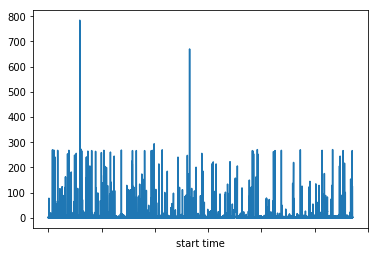

In [4]:
data_red = data.groupby('start time')['attack_flag'].sum()
data_red.plot()

In [5]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


1    149915
0     67713
Name: attack_flag, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [7]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,10106,17989,udp


In [8]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,0.688859,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.462961,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [9]:
# removing NaNs
data = data.dropna()
data.shape

(217628, 18)

In [10]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [11]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [12]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

## Change port number info to categorical

In [13]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
data['src port'].nunique()
data['dst port'].nunique()
print(data['src port'].value_counts()[100])
print(data['dst port'].value_counts()[115])

thresh1 = 100
thresh2 = 100
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is")], axis=1)

96
91


In [14]:
data.shape

(217628, 227)

## Hot one encoding

In [15]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)


,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Columns: 251 entries, conn len to state_SHR
dtypes: float64(7), int64(6), object(5), uint8(233)
memory usage: 79.9+ MB


## Data visualization

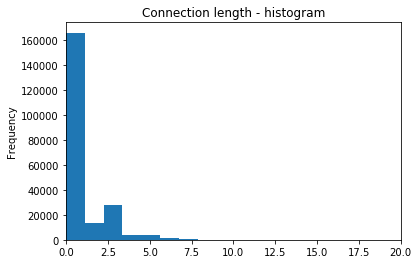

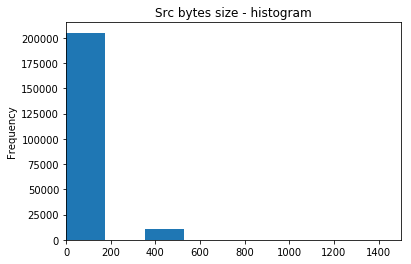

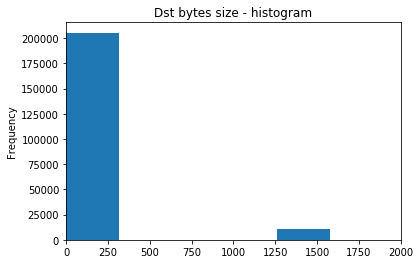

In [17]:
# hisotgrams

#print(max(data['conn len']))
data['conn len'].plot.hist(bins=500, xlim=[0,20], title="Connection length - histogram")
plt.show()

#print(max(data['src bytes']))
data['src bytes'].plot.hist(bins=500, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(data['dst bytes']))
data['dst bytes'].plot.hist(bins=500, xlim=[0,2000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

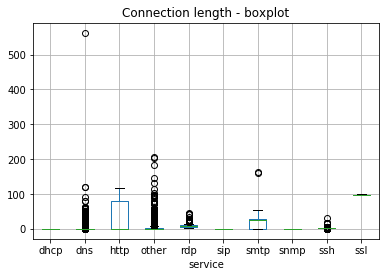

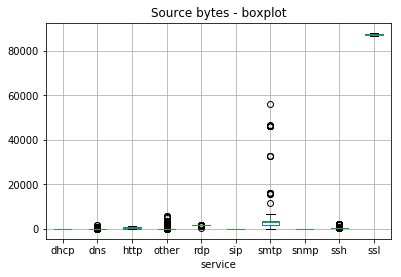

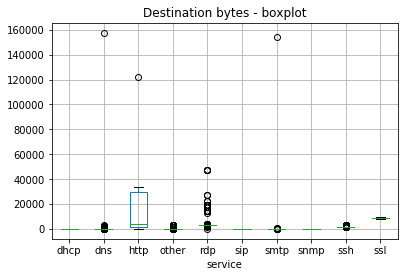

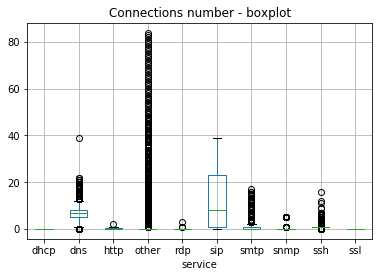

In [18]:
# boxplots
data.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

data.boxplot(column='src bytes', by='service')
plt.title("Source bytes - boxplot")
plt.suptitle("")

data.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

data.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

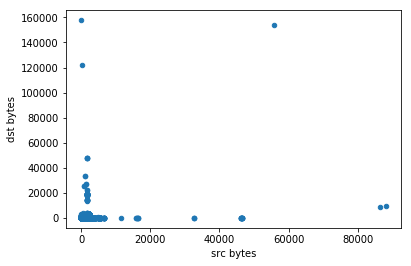

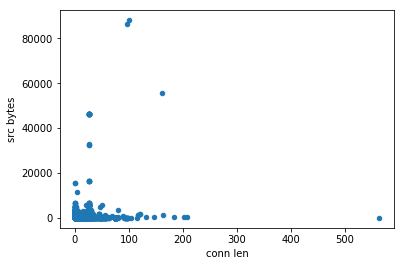

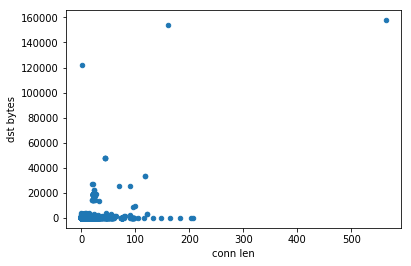

In [19]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [20]:
### drop categorical columns ####

data = data.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
#data = data.drop(["src port", "dst port"], axis=1)
data.shape

(217628, 246)

## Plot function definition

In [21]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [22]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])
train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)
y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 30946, 0: 1699})
Counter({0: 22937, 1: 9707})
Counter({1: 109262, 0: 43077})


## Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
hyperparams = {'solver' : ['newton-cg', 'lbfgs', 'sag']}

In [25]:
#sorted(metrics.SCORERS.keys())

In [27]:
clf = GridSearchCV(LogisticRegression(), hyperparams, cv=5, n_jobs=-1, scoring = "f1")
#clf.fit(X_train, y_train)

#print(clf.best_params_)

# {'solver': 'newton-cg'}

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_validate)

name = "logistic Regression"

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Acc[name] = metrics.accuracy_score(y_validate, y_pred)
F1S[name] = metrics.f1_score(y_validate, y_pred)
Prec[name] = metrics.precision_score(y_validate, y_pred)
Rec[name] = metrics.recall_score(y_validate, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.99485, F1-score: 0.99141, Precision: 0.98367, Recall: 0.99928, FPR: 0.00702
TN: 22776; FP: 161; FN:    7; TP: 9700



# Decision Tree parameters selection

## Checking tree depth impact

In [29]:
# using gridsearchcv to find the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier(random_state=0).get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [30]:
hyperparams = {'max_depth' : range(1,12), 'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [31]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), hyperparams, cv=10, n_jobs=-1, scoring = "f1")
#clf.fit(X_train, y_train)

#print(clf.best_params_)

# max depth : 8

In [32]:
classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_11":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 11),
               "DecisionTree_11":DecisionTreeClassifier(random_state=0, max_depth = 11),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.99920, F1-score: 0.99866, Precision: 0.99846, Recall: 0.99887, FPR: 0.00065
TN: 22922; FP:  15; FN:   11; TP: 9696

Algorithm: DecisionTree_ent_11 Accuracy: 0.99917, F1-score: 0.99861, Precision: 0.99866, Recall: 0.99856, FPR: 0.00057
TN: 22924; FP:  13; FN:   14; TP: 9693

Algorithm: DecisionTree_11 Accuracy: 0.99877, F1-score: 0.99794, Precision: 0.99651, Recall: 0.99938, FPR: 0.00148
TN: 22903; FP:  34; FN:    6; TP: 9701



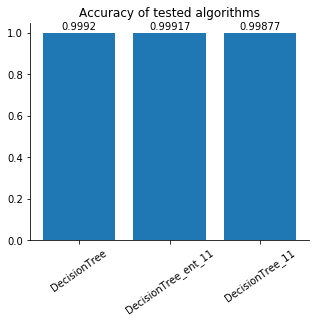

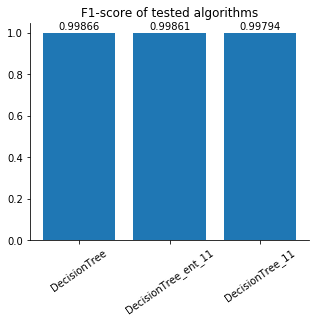

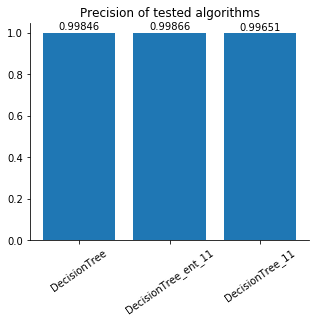

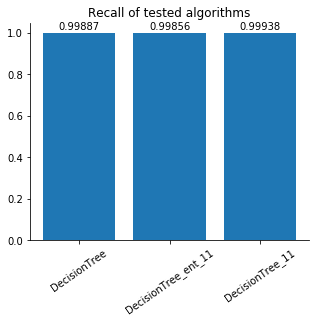

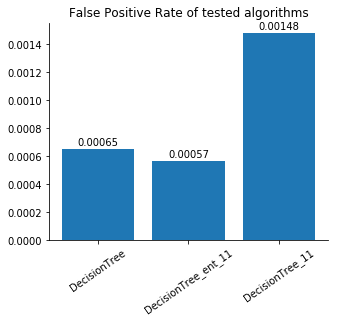

In [33]:
plot_stats(Acc, "Accuracy", 5, 35)
plot_stats(F1S, "F1-score", 5, 35)
plot_stats(Prec, "Precision", 5, 35)
plot_stats(Rec, "Recall", 5, 35)
plot_stats(FPR, "False Positive Rate", 5, 35)

## AdaBoost parameters selection

In [34]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth = 7)).get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 7,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [35]:
hyperparams = {"n_estimators" : range (1, 50)}

In [36]:
clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=0)), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
#clf.fit(X_train, y_train)

#print(clf.best_params_)

# Result: {'n_estimators': 44}, range tested: 1-50

In [37]:
num_trees = 44
seed = 12

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier()
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.99914, F1-score: 0.99856, Precision: 0.99743, Recall: 0.99969, FPR: 0.00109
TN: 22912; FP:  25; FN:    3; TP: 9704

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.99914, F1-score: 0.99856, Precision: 0.99763, Recall: 0.99948, FPR: 0.00100
TN: 22914; FP:  23; FN:    5; TP: 9702

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.99905, F1-score: 0.99840, Precision: 0.99763, Recall: 0.99918, FPR: 0.00100
TN: 22914; FP:  23; FN:    8; TP: 9699

Algorithm: AdaBoost_n_est Accuracy: 0.99868, F1-score: 0.99779, Precision: 0.99640, Recall: 0.99918, FPR: 0.00153
TN: 22902; FP:  35; FN:    8; TP: 9699

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99868, F1-score: 0.99779, Precision: 0.99640, Recall: 0.99918, FPR: 0.00153
TN: 22902; FP:  35; FN:    8; TP: 9699

Algorithm: AdaBoost_orig Accuracy: 0.99868, F1-score: 0.99779, Precision: 0.99630, Recall: 0.99928, FPR: 0.00157
TN: 22901; FP:  36; FN:    7; TP: 9700



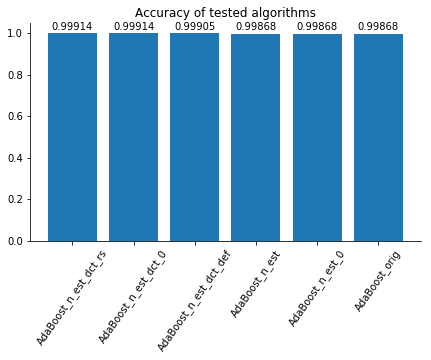

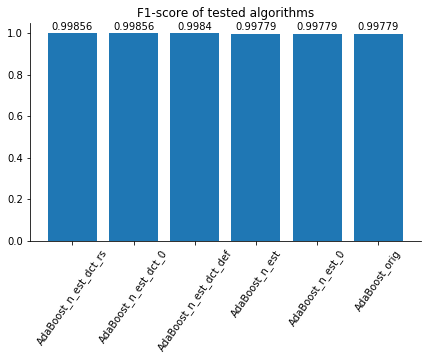

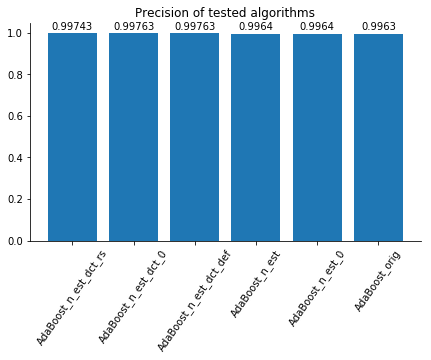

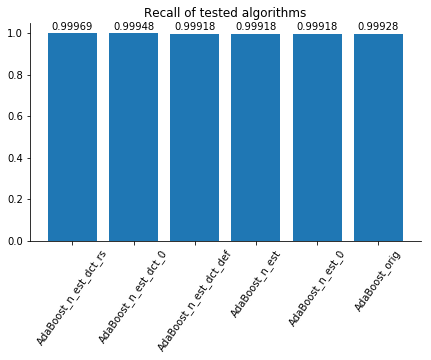

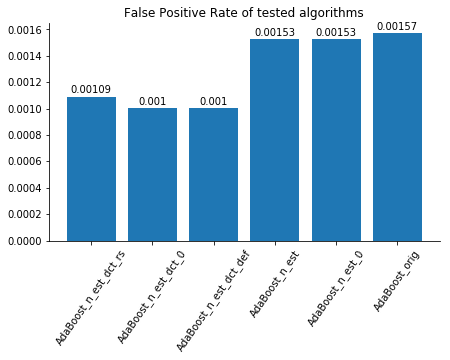

In [38]:
plot_stats(Acc, "Accuracy",7,  55)
plot_stats(F1S, "F1-score", 7, 55)
plot_stats(Prec, "Precision", 7, 55)
plot_stats(Rec, "Recall", 7, 55)
plot_stats(FPR, "False Positive Rate", 7, 55)

## Random tree parameters selection

In [43]:
hyperparams = {'max_depth' : range(1,12), 'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [44]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=0, splitter = "random"), hyperparams, cv=10, scoring = "f1", n_jobs=-1)
#clf.fit(X_train, y_train)

#print(clf.best_params_) --> 11

In [45]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_11":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 11),                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.99899, F1-score: 0.99830, Precision: 0.99774, Recall: 0.99887, FPR: 0.00096
TN: 22915; FP:  22; FN:   11; TP: 9696

Algorithm: RandomTree_11 Accuracy: 0.99715, F1-score: 0.99521, Precision: 0.99495, Recall: 0.99547, FPR: 0.00214
TN: 22888; FP:  49; FN:   44; TP: 9663



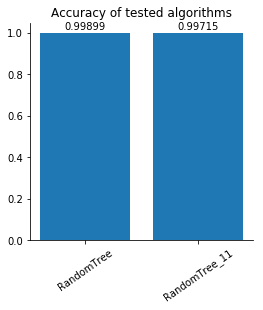

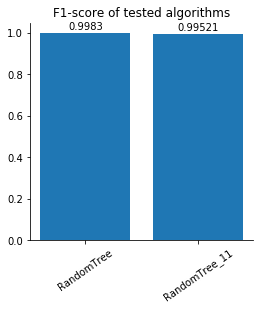

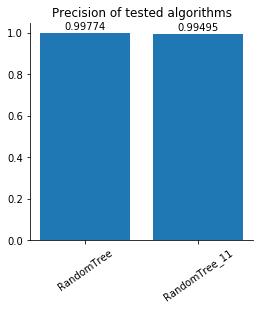

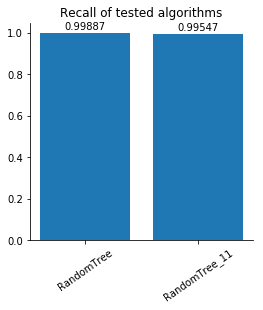

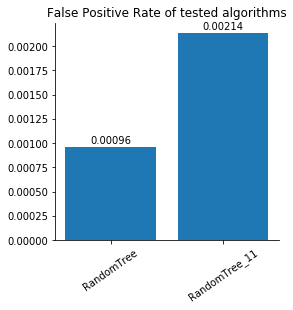

In [46]:
plot_stats(Acc, "Accuracy",4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

## Random Forest parameters selection

In [47]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(random_state=0).get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [48]:
hyperparams = {'n_estimators' : range(1, 50)}

In [49]:
clf = GridSearchCV(RandomForestClassifier(random_state=0), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
#clf.fit(X_train, y_train)

#print(clf.best_params_)

# {'n_estimators': 47}

In [50]:
hyperparams = {'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [51]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=47), hyperparams, cv=5 ,scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)
# {'max_features': 'auto'}

In [52]:
hyperparams = {'max_depth' : range(1,50)}

In [55]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=47, max_features='auto'), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
#clf.fit(X_train, y_train)

#print(clf.best_params_)
# {'max_depth': 28}

In [63]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

classifiers = {
                "RandomForest_new":RandomForestClassifier(n_estimators=47, max_depth=28, random_state=0),
                "RandomForest_orig":RandomForestClassifier(n_estimators=100),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest_new Accuracy: 0.99908, F1-score: 0.99846, Precision: 0.99733, Recall: 0.99959, FPR: 0.00113
TN: 22911; FP:  26; FN:    4; TP: 9703

Algorithm: RandomForest_orig Accuracy: 0.99923, F1-score: 0.99871, Precision: 0.99784, Recall: 0.99959, FPR: 0.00092
TN: 22916; FP:  21; FN:    4; TP: 9703



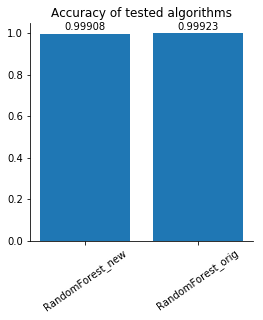

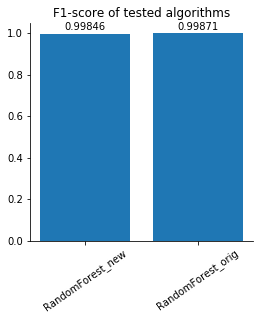

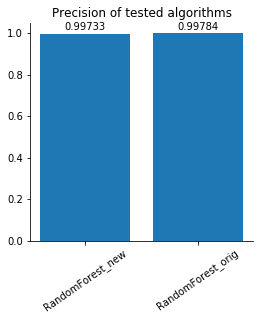

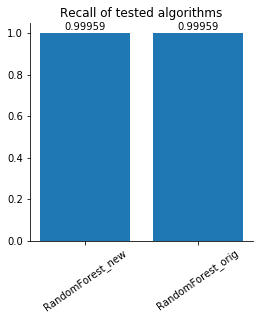

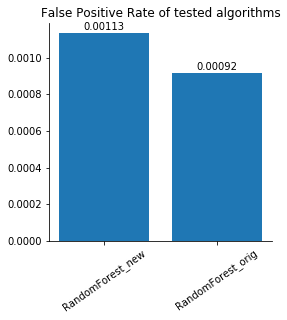

In [64]:
plot_stats(Acc, "Accuracy", 4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

# Algorithms' performance comparison

In [65]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Counter({1: 30946, 0: 1699})


In [66]:
# Metrics of baseline method
name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.94796, F1-score: 0.97328, Precision: 0.94796, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 1699; FN:    0; TP: 30946



In [67]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

seed = 12
num_trees = 44

classifiers = {"LogisticReg":LogisticRegression(solver = 'newton-cg'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=100),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: LogisticReg  Accuracy: 0.97271, F1-score: 0.98557, Precision: 0.98799, Recall: 0.98316, FPR: 0.21778
TN: 1329; FP: 370; FN:  521; TP: 30425

Algorithm: AdaBoost     Accuracy: 0.98729, F1-score: 0.99327, Precision: 0.99629, Recall: 0.99027, FPR: 0.06710
TN: 1585; FP: 114; FN:  301; TP: 30645

Algorithm: DecisionTree Accuracy: 0.98628, F1-score: 0.99273, Precision: 0.99658, Recall: 0.98892, FPR: 0.06180
TN: 1594; FP: 105; FN:  343; TP: 30603

Algorithm: NaiveBayes   Accuracy: 0.94903, F1-score: 0.97244, Precision: 0.99752, Recall: 0.94859, FPR: 0.04297
TN: 1626; FP:  73; FN: 1591; TP: 29355

Algorithm: RandomTree   Accuracy: 0.98707, F1-score: 0.99315, Precision: 0.99717, Recall: 0.98917, FPR: 0.05121
TN: 1612; FP:  87; FN:  335; TP: 30611

Algorithm: RandomForest Accuracy: 0.98766, F1-score: 0.99347, Precision: 0.99588, Recall: 0.99108, FPR: 0.07475
TN: 1572; FP: 127; FN:  276; TP: 30670



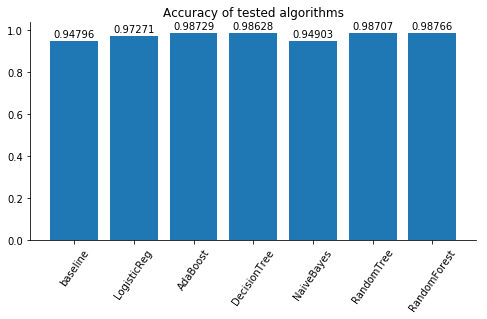

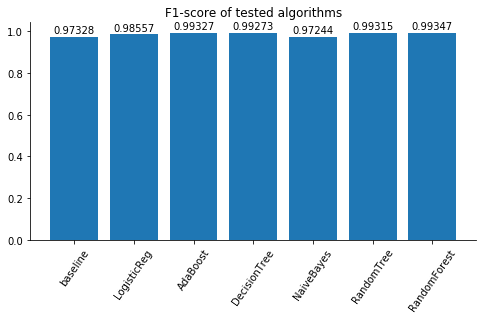

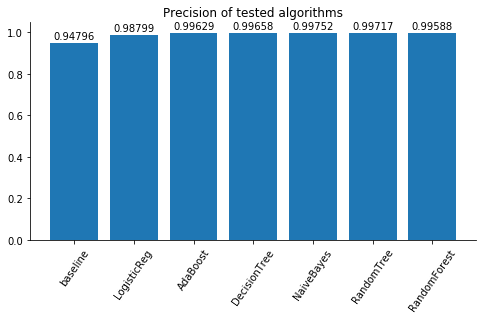

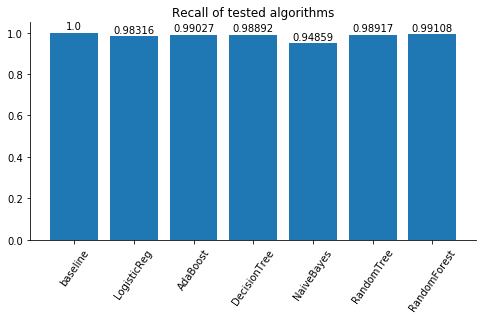

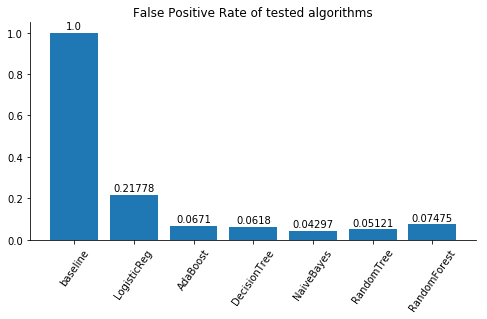

In [68]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Scaling

In [69]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

seed = 12

classifiers = {"LogisticReg":LogisticRegression(solver = 'newton-cg'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=100),
              }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: LogisticReg_scaled Accuracy: 0.97577, F1-score: 0.98721, Precision: 0.98809, Recall: 0.98633, FPR: 0.21660
TN: 1331; FP: 368; FN:  423; TP: 30523



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: AdaBoost_scaled Accuracy: 0.98787, F1-score: 0.99358, Precision: 0.99717, Recall: 0.99001, FPR: 0.05121
TN: 1612; FP:  87; FN:  309; TP: 30637



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: DecisionTree_scaled Accuracy: 0.98625, F1-score: 0.99272, Precision: 0.99655, Recall: 0.98892, FPR: 0.06239
TN: 1593; FP: 106; FN:  343; TP: 30603



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: NaiveBayes_scaled Accuracy: 0.72657, F1-score: 0.83186, Precision: 0.99725, Recall: 0.71353, FPR: 0.03590
TN: 1638; FP:  61; FN: 8865; TP: 22081



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomTree_scaled Accuracy: 0.98707, F1-score: 0.99315, Precision: 0.99717, Recall: 0.98917, FPR: 0.05121
TN: 1612; FP:  87; FN:  335; TP: 30611



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest_scaled Accuracy: 0.98729, F1-score: 0.99328, Precision: 0.99549, Recall: 0.99108, FPR: 0.08181
TN: 1560; FP: 139; FN:  276; TP: 30670



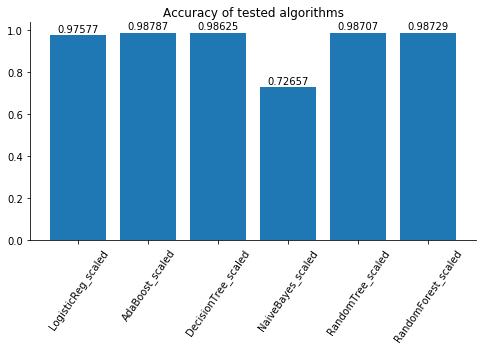

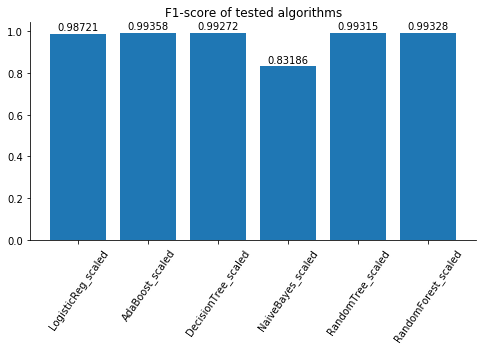

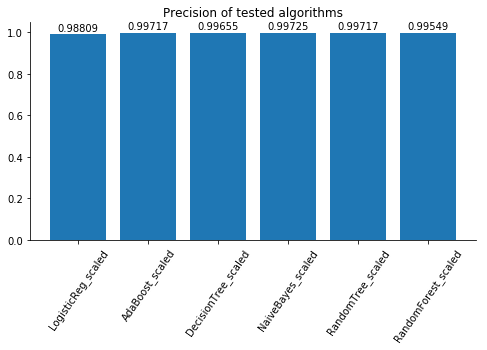

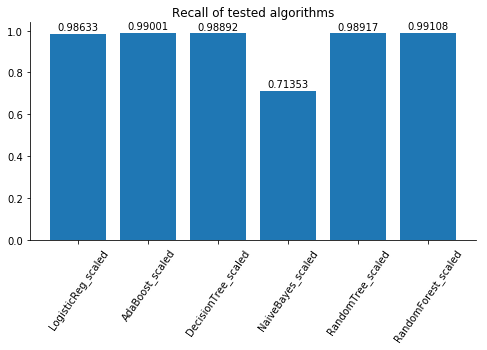

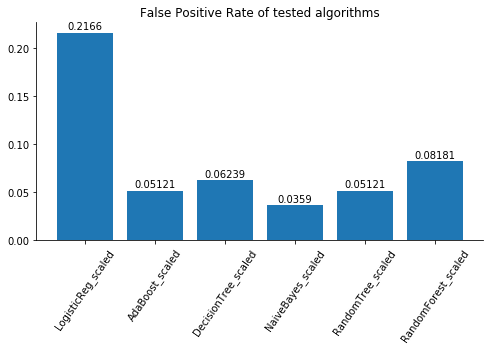

In [70]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Results comparison

In [71]:
# Metrics of baseline method

y_pred = {}

name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred["baseline"] = np.ones(len(y_test)).ravel() 
else:
    y_pred["baseline"] = np.zeros(len(y_test)).ravel()
        
y_pred["baseline"] = y_pred["baseline"].astype(int)    

In [73]:
classifiers = {"LogisticReg":LogisticRegression(solver = 'newton-cg'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=100),
              }

 

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred[name] = model.predict(X_test)

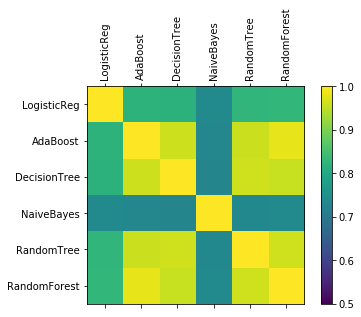

In [74]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [75]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.823300      0.822247    0.737755    0.828900   
AdaBoost         0.823300  1.000000      0.961908    0.731475    0.959831   
DecisionTree     0.822247  0.961908      1.000000    0.727423    0.963321   
NaiveBayes       0.737755  0.731475      0.727423    1.000000    0.733055   
RandomTree       0.828900  0.959831      0.963321    0.733055    1.000000   
RandomForest     0.830095  0.982047      0.957175    0.737423    0.963473   

              RandomForest  
LogisticReg       0.830095  
AdaBoost          0.982047  
DecisionTree      0.957175  
NaiveBayes        0.737423  
RandomTree        0.963473  
RandomForest      1.000000  


In [77]:
failures = {}
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(1)
        else:
            failures[key].append(0)   


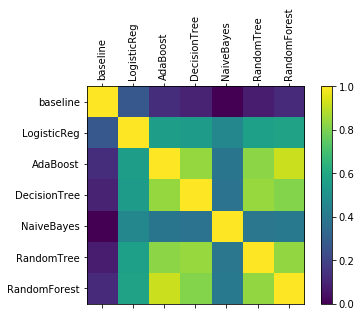

In [78]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [79]:
print(correlations)

              baseline  LogisticReg  AdaBoost  DecisionTree  NaiveBayes  \
baseline      1.000000     0.273921  0.131772      0.096830   -0.008529   
LogisticReg   0.273921     1.000000  0.558527      0.549060    0.462080   
AdaBoost      0.131772     0.558527  1.000000      0.840049    0.389120   
DecisionTree  0.096830     0.549060  0.840049      1.000000    0.382085   
NaiveBayes   -0.008529     0.462080  0.389120      0.382085    1.000000   
RandomTree    0.079404     0.563346  0.824941      0.844286    0.395155   
RandomForest  0.117673     0.575110  0.921486      0.815859    0.403960   

              RandomTree  RandomForest  
baseline        0.079404      0.117673  
LogisticReg     0.563346      0.575110  
AdaBoost        0.824941      0.921486  
DecisionTree    0.844286      0.815859  
NaiveBayes      0.395155      0.403960  
RandomTree      1.000000      0.836060  
RandomForest    0.836060      1.000000  
